In [130]:
#Import library
import pandas as pd
import numpy as np
import seaborn as sns
import shap
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
import xgboost as xgb
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
pd.set_option('display.max_colwidth', -1)

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [300]:
#read data
df = pd.read_csv("C:/Users/EB09/Pictures/Interview/Codex/dataset HR/dataset HR analytics ver1.csv")
print("Total data : {} data".format(len(df)))

#show data preview
df.head()

Total data : 287 data


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,RoleID,LevelID,PerfScoreID,Tribe,...,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,DateofTermination_v1,Duration,Age
0,A Ridwan,10001,Not married,Single,M,TKP/ Outsource,Product Owner,Senior,Exceed,EWD,...,LinkedIn,4.60,5,0,1/17/2020,0,1,7/24/2021,10,38
1,Ade Setyanto,10002,Not married,Single,M,TKP/ Outsource,Product Owner,Senior,Fully meets,EWD,...,Indeed,4.96,3,6,2/24/2017,0,17,6/16/2018,3,46
2,Adhitya Bramantya Ranggatyasta,10003,Married,Divorced,F,TKP/ Outsource,Product Owner,Senior,Average,ENT,...,LinkedIn,3.02,3,0,5/15/2013,0,3,9/24/2014,3,32
3,Adji Wijaya Kusuma,10004,Not married,Single,F,TKP/ Outsource,Business Analyst,Middle,Exceed,ENT,...,Indeed,4.84,5,0,1/3/2020,0,15,7/24/2021,13,32
4,Agus Andri Putra,10005,Not married,Single,F,Prohire,Business Analyst,Middle,Average,EDU,...,Google Search,5.00,4,0,2/1/2017,0,2,9/6/2018,7,31


In [301]:
#show info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               287 non-null    object 
 1   EmpID                       287 non-null    int64  
 2   MarriedID                   287 non-null    object 
 3   MaritalStatusID             287 non-null    object 
 4   GenderID                    287 non-null    object 
 5   EmpStatusID                 287 non-null    object 
 6   RoleID                      287 non-null    object 
 7   LevelID                     287 non-null    object 
 8   PerfScoreID                 287 non-null    object 
 9   Tribe                       287 non-null    object 
 10  Squad                       287 non-null    object 
 11  DOB                         287 non-null    object 
 12  RaceDesc                    287 non-null    object 
 13  DateofHire                  287 non

In [302]:
def cek(x):
    return 4-(list(df.PerfScoreID.unique()).index(x))
    
df["PerfScore"] = df.apply(lambda x: cek(x["PerfScoreID"]), axis=1)
df["Left"] = df.apply(lambda x: "Left" if (x["EmploymentStatus"]=="Voluntarily Terminated") or (x["EmploymentStatus"]=="Terminated for Cause") else "Active", axis=1)

## Analysis

In [248]:
df.groupby('EmploymentStatus').mean()

,EmpID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Duration,Age,PerfScore
EmploymentStatus,,,,,,,,,
Active,10139.304124,4.129124,3.891753,1.391753,0.309278,9.742268,7.479381,41.386598,2.469072
Terminated for Cause,10101.214286,3.494286,3.785714,1.714286,2.357143,11.285714,5.071429,41.357143,2.642857
Voluntarily Terminated,10163.113924,4.180506,3.924051,0.569620,0.316456,11.101266,5.088608,43.405063,2.518987


In [249]:
left = df.groupby('Left')
left.mean()

,EmpID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Duration,Age,PerfScore
Left,,,,,,,,,
Active,10139.304124,4.129124,3.891753,1.391753,0.309278,9.742268,7.479381,41.386598,2.469072
Left,10153.795699,4.077204,3.903226,0.741935,0.623656,11.129032,5.086022,43.096774,2.537634


In [25]:
df.describe()

,EmpID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Duration,Age
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,10144.000000,4.112300,3.895470,1.181185,0.411150,10.191638,6.703833,41.940767
std,82.993976,0.794004,0.910053,2.290585,1.273018,5.930383,2.274690,8.858640
min,10001.000000,1.120000,1.000000,0.000000,0.000000,1.000000,2.000000,28.000000
25%,10072.500000,3.700000,3.000000,0.000000,0.000000,5.000000,5.000000,35.000000
50%,10144.000000,4.280000,4.000000,0.000000,0.000000,10.000000,7.000000,40.000000
75%,10215.500000,4.700000,5.000000,0.000000,0.000000,15.000000,8.000000,47.000000
max,10287.000000,5.000000,5.000000,8.000000,6.000000,20.000000,15.000000,70.000000


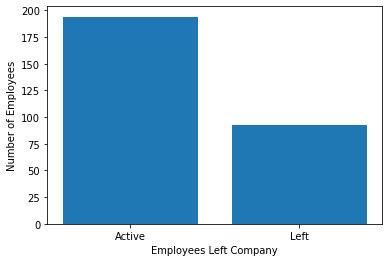

In [250]:
left_count = df.groupby('Left').count()
plt.bar(left_count.index.values, left_count['EmpID'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

In [31]:
df.Left.value_counts()

Active    194
Left      93 
Name: Left, dtype: int64

<AxesSubplot:xlabel='count', ylabel='TermReason'>

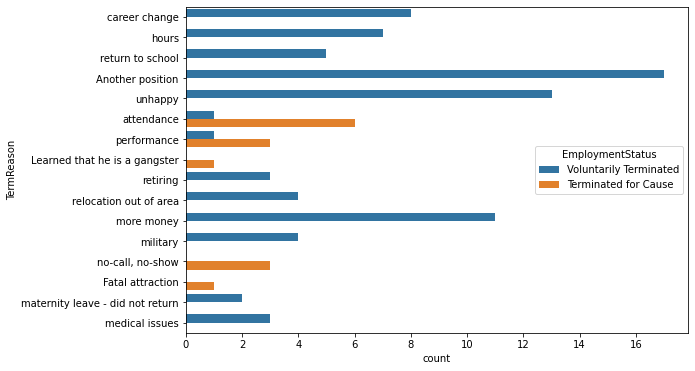

In [309]:
#region propotion
fig, ax = plt.subplots(figsize=(9,6))
sns.countplot(y="TermReason", data=df[df['Left']=='Left'], hue='EmploymentStatus')

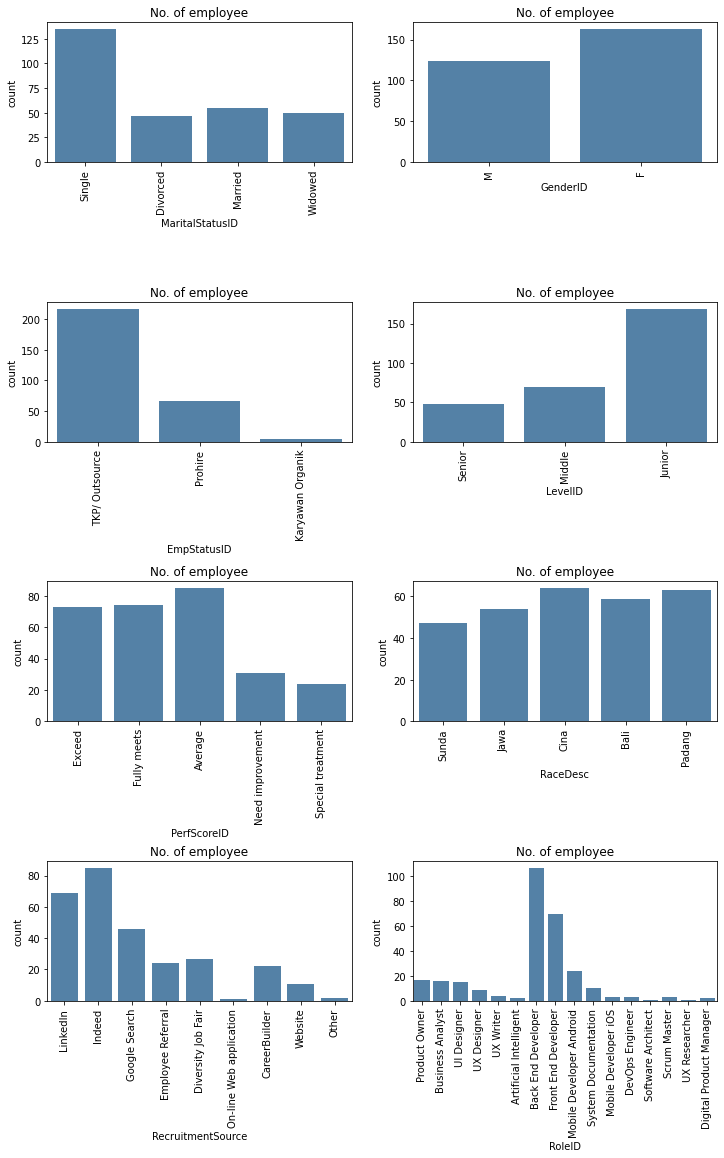

In [257]:
features1 = ['MaritalStatusID', 'GenderID', 'EmpStatusID', 'LevelID', 'PerfScoreID',
            'RaceDesc', 'RecruitmentSource', 'RoleID']
fig=plt.subplots(figsize=(12,18))
for i, j in enumerate(features1):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j, data=df, color="steelblue")
    plt.xticks(rotation=90)
    plt.title("No. of employee")

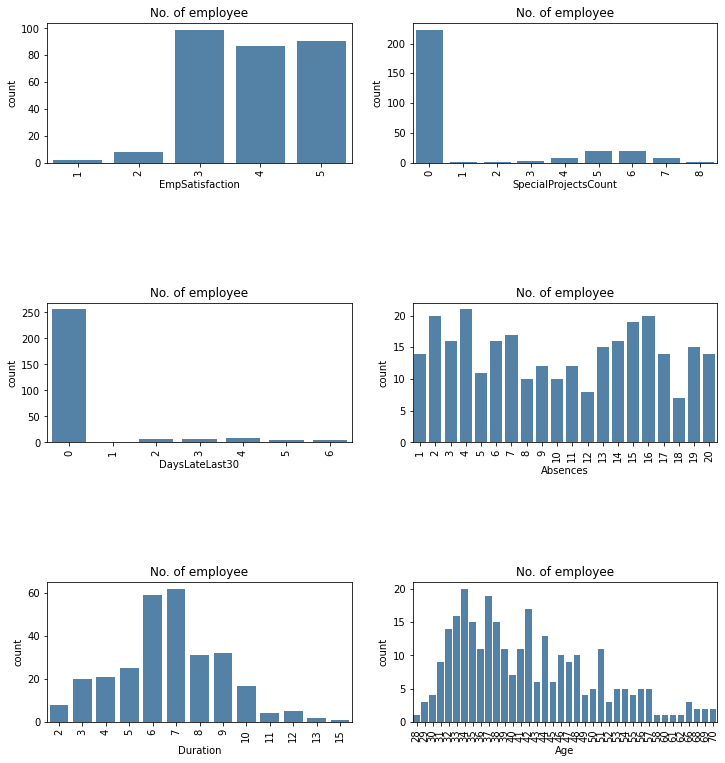

In [258]:
features2 = ['EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences', 'Duration', 'Age']
fig=plt.subplots(figsize=(12,18))
for i, j in enumerate(features2):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j, data=df, color="steelblue")
    plt.xticks(rotation=90)
    plt.title("No. of employee")

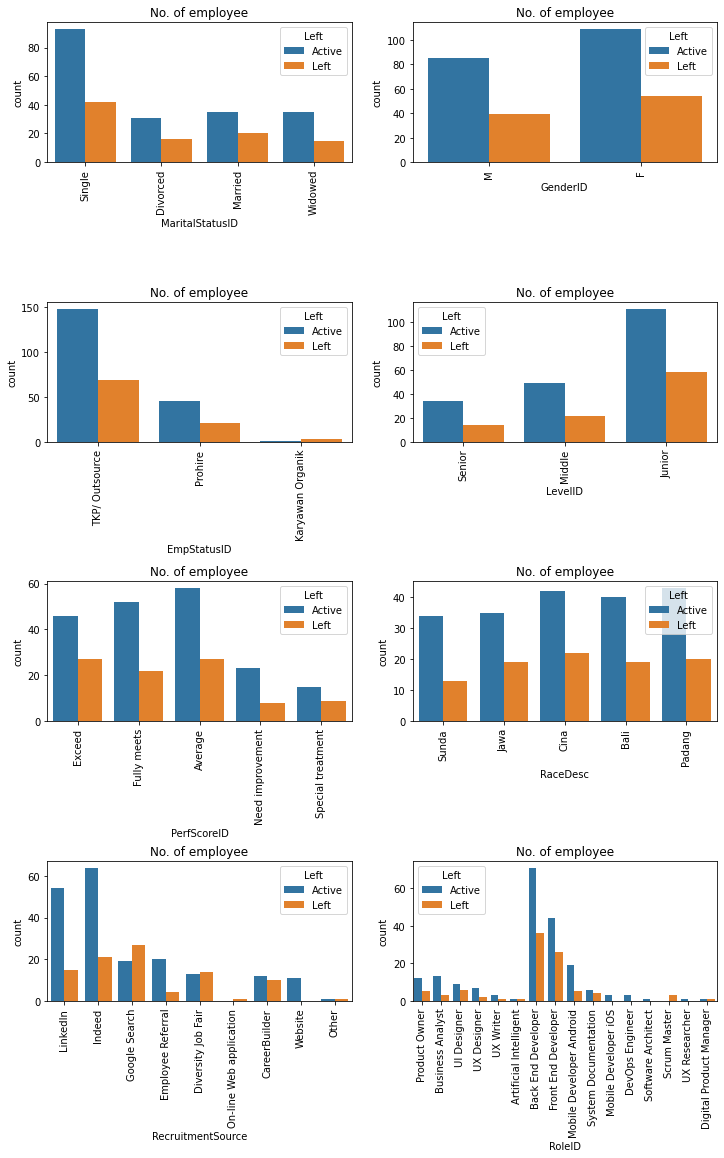

In [260]:
fig=plt.subplots(figsize=(12,18))
for i, j in enumerate(features1):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j, data=df, hue='Left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

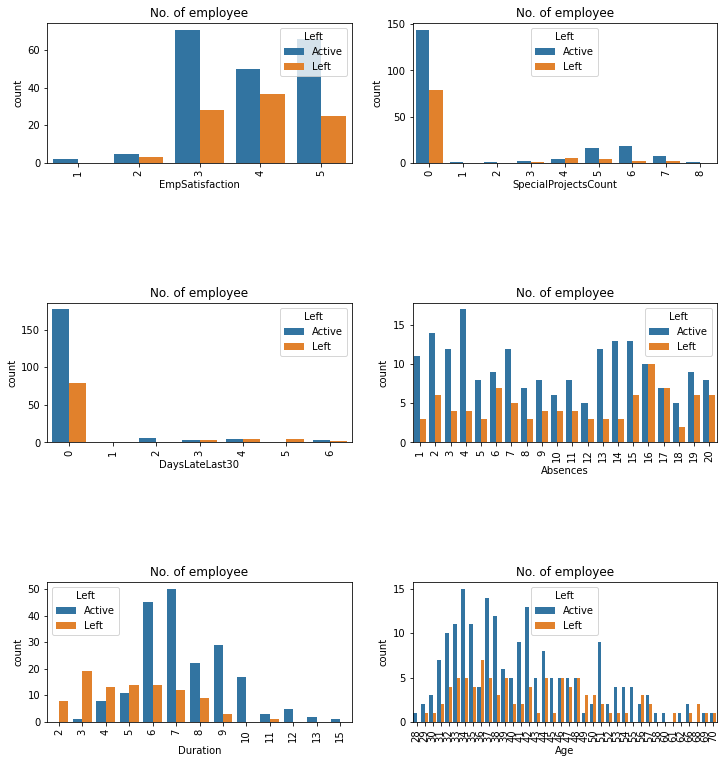

In [259]:
fig=plt.subplots(figsize=(12,18))
for i, j in enumerate(features2):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j, data=df, hue='Left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

## Machine Learning

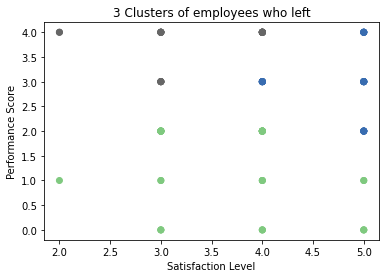

In [271]:
# Filter data
left_emp =  df[['EmpSatisfaction', 'PerfScore']][df.Left == "Left"]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_

# Draw scatter plot
plt.scatter(left_emp['EmpSatisfaction'], left_emp['PerfScore'],
            c=left_emp['label'], cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Performance Score')
plt.title('3 Clusters of employees who left')
plt.show()

Text(0, 0.5, 'Perf Score')

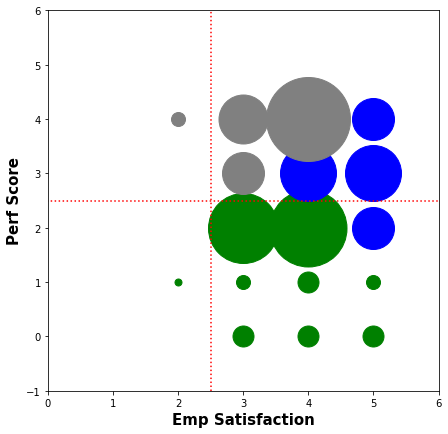

In [298]:
dfs = pd.crosstab([left_emp.EmpSatisfaction, left_emp.PerfScore], left_emp.label).reset_index()

fig = plt.figure(figsize=(7, 7)) 
ax = fig.add_subplot(1, 1, 1)

for i in range(len(dfs)):
    if dfs[0][i] != 0:
        plt.plot(dfs['EmpSatisfaction'][i], dfs['PerfScore'][i], 'o', 
                 markersize=dfs[0][i]*7, color="green")
    if dfs[1][i] != 0:
        plt.plot(dfs['EmpSatisfaction'][i], dfs['PerfScore'][i], 'o', 
                 markersize=dfs[1][i]*7, color="blue")
    if dfs[2][i] != 0:
        plt.plot(dfs['EmpSatisfaction'][i], dfs['PerfScore'][i], 'o', 
                 markersize=dfs[2][i]*7, color="grey")  
        
#plot axis
plt.plot(np.linspace(-1, 6), np.linspace(2.5, 2.5), c="red", linestyle=':')
plt.plot(np.linspace(2.5, 2.5), np.linspace(-1, 6), c="red", linestyle=':')

#set axis xy and labeling axis
plt.xlim([0, 6])
plt.ylim([-1, 6])
ax.set_xlabel('Emp Satisfaction', fontweight='bold', fontsize=15)
ax.set_ylabel('Perf Score', fontweight='bold', fontsize=15)

# plt.title('Cluster', fontweight='bold', fontsize=20, y=(1.1))

In [272]:
# label encoding the ordinal variables
le = LabelEncoder()
df["left_cat"] = le.fit_transform(df.Left)

var_mod = ['MaritalStatusID', 'GenderID', 'EmpStatusID', 'RoleID','LevelID', 'Tribe', 'Squad', 
           'RaceDesc', 'RecruitmentSource']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

# # one hot encoding the remaining categorical variables 
# df = pd.get_dummies(df, columns=['MaritalStatusID','GenderID','EmpStatusID', 'RoleID','LevelID', 
#                                  'Tribe', 'Squad', 'DOB', 'RaceDesc', 'RecruitmentSource'])

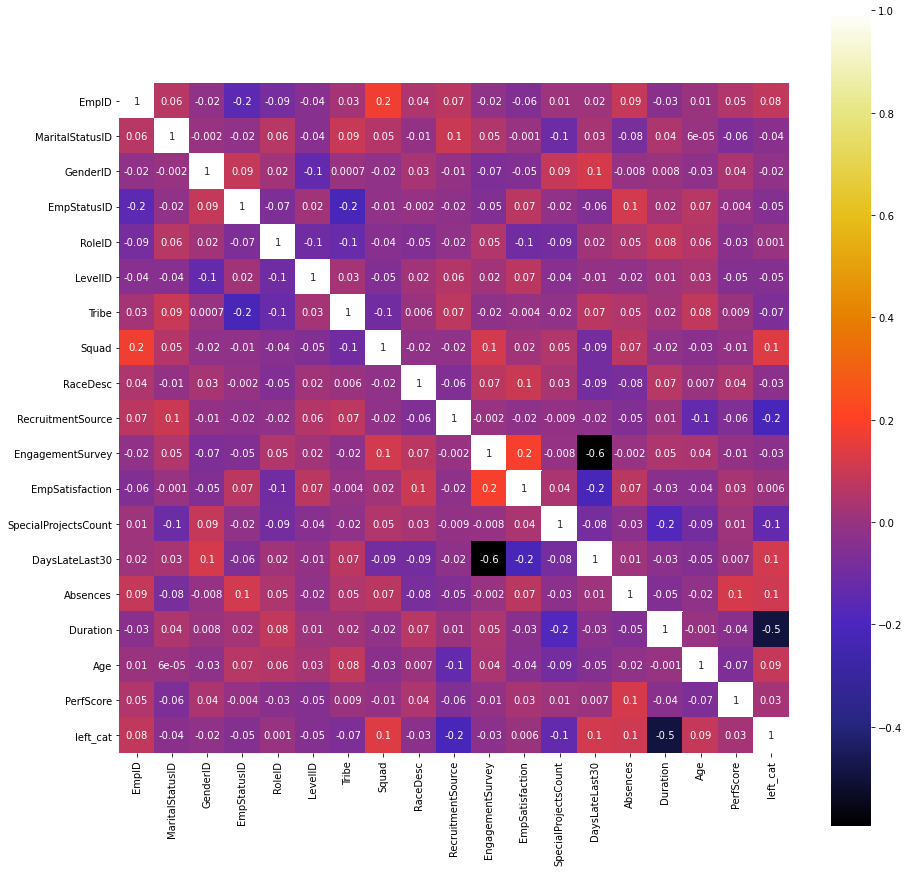

In [273]:
fig = plt.subplots(figsize=(15,15))
corr = df.corr()
ax = sns.heatmap(corr, annot=True, fmt='.1g', cmap='CMRmap', square='True')

In [274]:
# dropping the ID variables and variables that have been used to extract new variables
dfs = df.drop(['Employee_Name','EmpID', 'MarriedID', 'PerfScoreID', 'DateofHire', 'DOB', 
              'DateofTermination', 'TermReason', 'EmploymentStatus', 'LastPerformanceReview_Date', 
              'DateofTermination_v1', 'Left'] ,axis=1)

# separating the dependent and independent variables
X = dfs.drop('left_cat', axis=1)
y = dfs['left_cat']

# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [236]:
#Fitting Decision Tree 
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

#Generating Predictions
y_pred = dt_model.predict(X_test)

#Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
#Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7758620689655172
Precision: 0.5555555555555556
Recall: 0.6666666666666666


In [237]:
#Fitting Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=123)
rf_model.fit(X_train, y_train)

#Generating Predictions
y_pred = rf_model.predict(X_test)

#Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
#Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8793103448275862
Precision: 0.8333333333333334
Recall: 0.6666666666666666


In [238]:
#Fitting XGBoost 
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

#Generating Predictions
y_pred = xgb_model.predict(X_test)

#Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
#Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9137931034482759
Precision: 0.8125
Recall: 0.8666666666666667


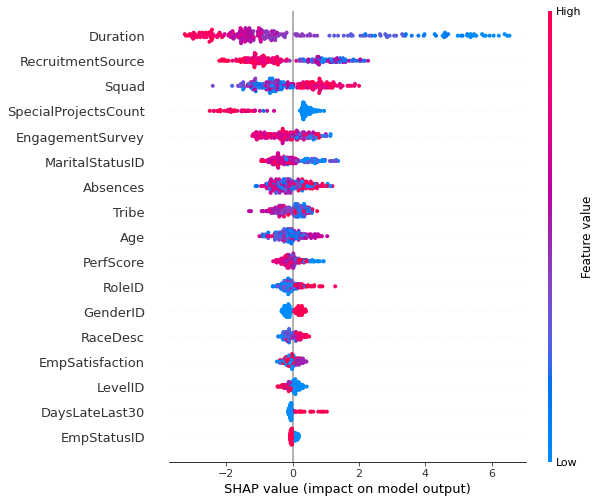

In [239]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

In [1]:
#ADD MODEL